<a href="https://colab.research.google.com/github/prajwalDU/Bike-sharing-demand-prdiction-prajwal/blob/main/Final_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


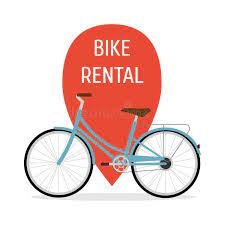

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting drive to load data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing dataset
data = pd.read_csv('/content/drive/MyDrive/almabetter/ML/SeoulBikeData.csv', encoding = 'unicode_escape', parse_dates=['Date'])

In [4]:
# Checking first 5 rows of data
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# Checking last 5 rows of data
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
# Check the shape of data
data.shape

(8760, 14)

In [7]:
# Get easy way to familiar with dataset is checking dataset type
data.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
dtype: object

In [8]:
# Another way to get familiar with dataset is checking describe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [9]:
# Checking sum of null values in each columns
data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# **EDA**

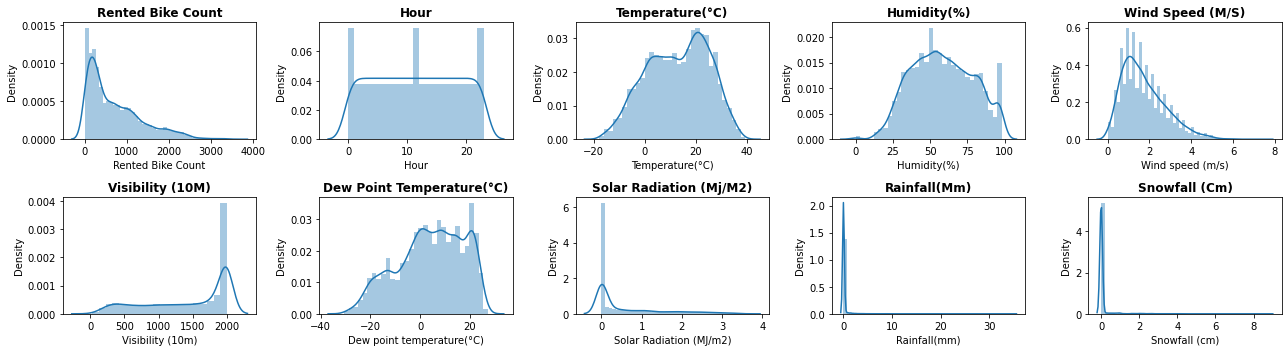

In [10]:
# Visualizing the distribution
plt.figure(figsize=(18,5))
for n, column in enumerate(data.describe().columns):
  plt.subplot(2, 5, n+1)
  sns.distplot(data[column])
  plt.title(f'{column.title()}', fontweight='bold')
  plt.tight_layout()

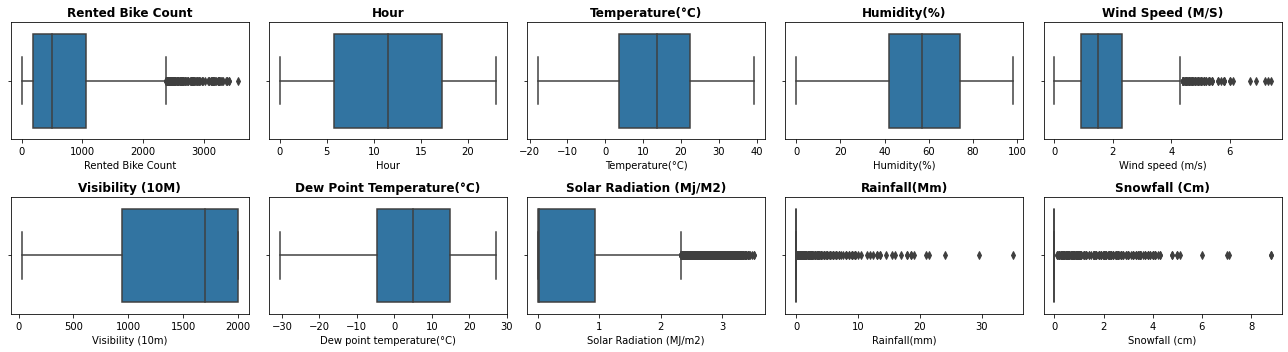

In [11]:
import enum
# Checking outlieres using boxplot
plt.figure(figsize=(18,5))
for n, column in enumerate(data.describe().columns):
  plt.subplot(2, 5, n+1)
  sns.boxplot(data[column])
  plt.title(f'{column.title()}', fontweight='bold')
  plt.tight_layout()

In [12]:
# Removing outliers by using IQR method:
q1, q3, median = data['Rented Bike Count'].quantile([0.25,0.5,0.75])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
data['Rented Bike Count'] = np.where(data['Rented Bike Count'] > upper_limit, median, np.where(
                              data['Rented Bike Count'] < lower_limit, median, data['Rented Bike Count']))

# Removing outliers by capping
for col in ['Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']:
  upper_limit = data[col].quantile(0.99)
  data[col] = np.where(data[col] > upper_limit, upper_limit, data[col])

In [13]:
# Creating new features from date and hour column
data['weekend'] = data['Date'].apply(lambda x : 1 if (x.day_name()=='Saturday' or x.day_name()=='Sunday') else 0)
data['Day/Night'] = data['Hour'].apply(lambda x : 'Night' if (x > 20 or x < 5) else('Day'))

In [14]:
# Droping the date column
data.drop(columns=['Date'], inplace=True)

In [15]:
# Lets take care of categorical columns
categorical_features = [i for i in data.columns if i not in data.describe().columns]
categorical_features

['Seasons', 'Holiday', 'Functioning Day', 'Day/Night']

In [16]:
for col in categorical_features:
  print(data[col].value_counts(), '\n')

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64 

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64 

Yes    8465
No      295
Name: Functioning Day, dtype: int64 

Day      5840
Night    2920
Name: Day/Night, dtype: int64 



In [17]:
# Defining label encoder based on above data
encoder = {'Holiday' : {'Holiday':1, 'No Holiday':0},
           'Functioning Day' : {'Yes':1, 'No':0},
           'Day/Night' : {'Day':1, 'Night':0}}
    
# Label encoding
data = data.replace(encoder)

In [18]:
# Apply one hot encoding on seasons column
data = pd.get_dummies(data, columns=['Seasons'], prefix='', prefix_sep='')

In [19]:
# Looking our new dataset
data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,weekend,Day/Night,Autumn,Spring,Summer,Winter
0,254.00,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
1,204.00,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
2,173.00,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0,0,0,1
3,107.00,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
4,78.00,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1065.25,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,0,1,1,0,0,0
8756,764.00,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,0,1,1,0,0,0
8757,694.00,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,0,0,1,0,0,0
8758,712.00,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,0,0,1,0,0,0


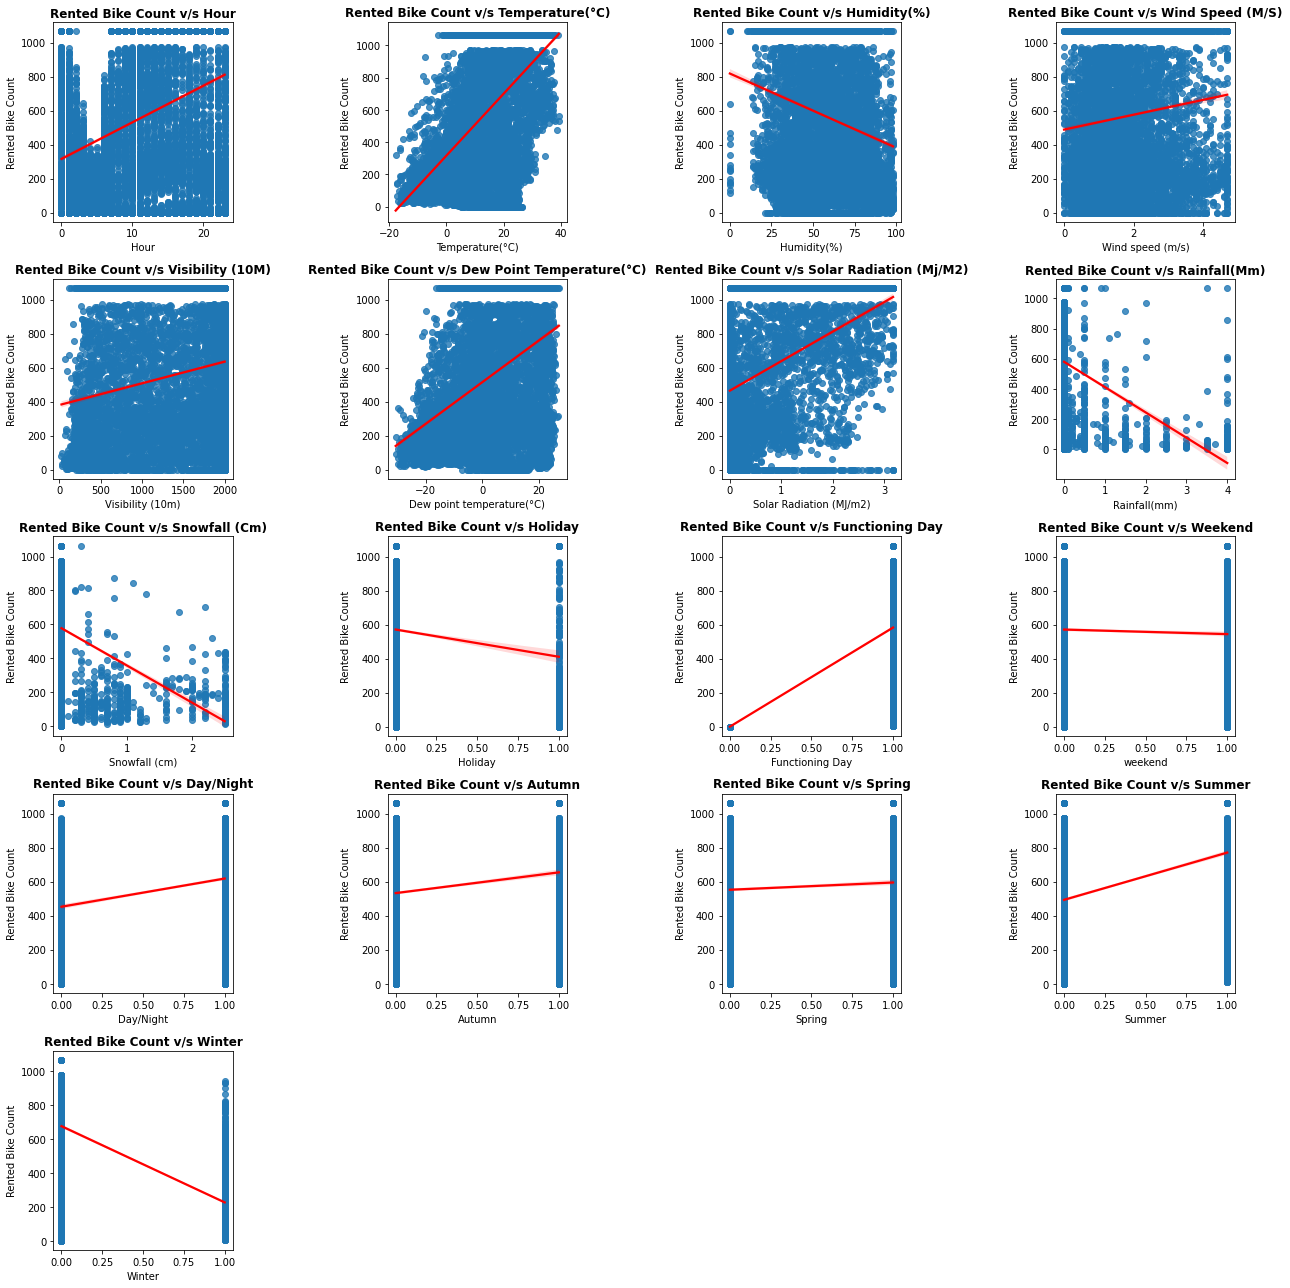

In [20]:
independent_variables = [i for i in data.columns if i not in ['Rented Bike Count']]

# Checking linearity
plt.figure(figsize=(18,18))
for n,column in enumerate(independent_variables):
  plt.subplot(5, 4, n+1)
  sns.regplot(data = data, x=column, y='Rented Bike Count', line_kws={"color":"red"})
  plt.title(f'Rented Bike Count v/s {column.title()}', fontweight='bold')
  plt.tight_layout()

In [21]:
# Checking skewness of all columns
data.skew().sort_values(ascending=True)

Functioning Day             -5.170969
Day/Night                   -0.707228
Visibility (10m)            -0.701786
Dew point temperature(°C)   -0.367298
Temperature(°C)             -0.198326
Hour                         0.000000
Humidity(%)                  0.059579
Rented Bike Count            0.101255
Wind speed (m/s)             0.771688
weekend                      0.923555
Spring                       1.142294
Summer                       1.142294
Autumn                       1.159123
Winter                       1.176139
Solar Radiation (MJ/m2)      1.488480
Holiday                      4.163603
Snowfall (cm)                5.995525
Rainfall(mm)                 6.304076
dtype: float64

As we seen above negative('-') symbol data tell negatively skewed and positively skewed data are above 0.00.


# Checking and Removing multicolinearity

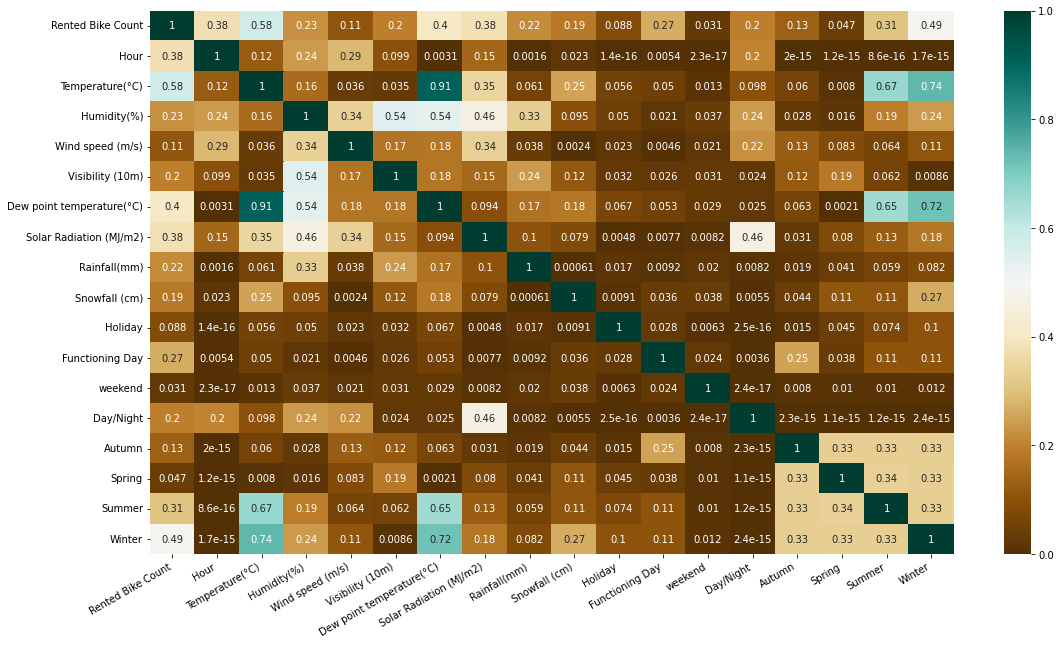

In [22]:
# Checking corelations
plt.figure(figsize=(18,10))
plot = sns.heatmap(abs(data.corr()), annot=True, cmap='BrBG')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [23]:
# importing vif 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Write a function for calculating variance inflation factor(VIF)
def cal_vif(X):
  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif.sort_values(by='VIF', ascending=False).reset_index(drop=True))

In [24]:
# Checking VIF for each variable
independent_variables = [i for i in data.columns if i not in ['Rented Bike Count']]
cal_vif(data[independent_variables])

,variables,VIF
0,Dew point temperature(°C),118.994269
1,Summer,116.455922
2,Spring,112.959119
3,Autumn,111.124536
4,Winter,108.276416
5,Temperature(°C),90.644917
6,Humidity(%),21.161156
7,Solar Radiation (MJ/m2),2.339258
8,Visibility (10m),1.697444
9,Day/Night,1.336874


In [25]:
independent_variables = [i for i in data.columns if i not in ['Rented Bike Count', 'Dew point temperature(°C)', 'Summer', 'Winter', 'Humidity(%)', 'Visibility (10m)']]
cal_vif(data[independent_variables])

,variables,VIF
0,Functioning Day,7.046633
1,Wind speed (m/s),4.628382
2,Hour,4.224149
3,Day/Night,3.894326
4,Temperature(°C),2.690353
5,Solar Radiation (MJ/m2),2.333933
6,Spring,1.505835
7,Autumn,1.425233
8,weekend,1.390680
9,Snowfall (cm),1.123084


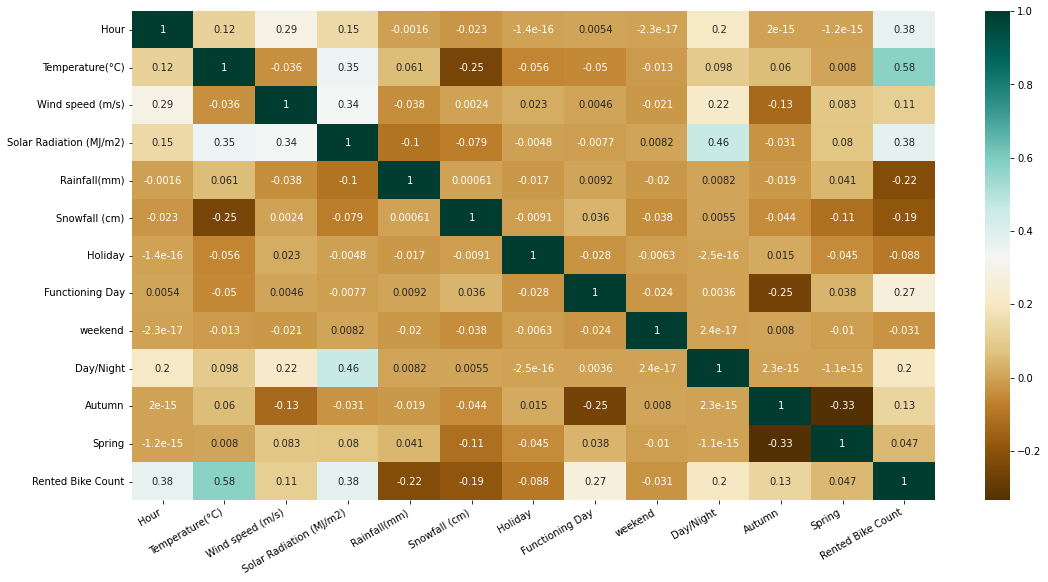

In [26]:
# Updating dataset
df = data[independent_variables + ['Rented Bike Count']]

# Checking corelation
plt.figure(figsize=(18,9))
plot = sns.heatmap(df.corr(), annot=True, cmap='BrBG')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [27]:
df.head()

,Hour,Temperature(°C),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,weekend,Day/Night,Autumn,Spring,Rented Bike Count
0,0,-5.2,2.2,0.0,0.0,0.0,0,1,0,0,0,0,254.0
1,1,-5.5,0.8,0.0,0.0,0.0,0,1,0,0,0,0,204.0
2,2,-6.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,173.0
3,3,-6.2,0.9,0.0,0.0,0.0,0,1,0,0,0,0,107.0
4,4,-6.0,2.3,0.0,0.0,0.0,0,1,0,0,0,0,78.0


# **Model Building**

In [28]:
# Importing packages
from sklearn import preprocessing
from sklearn import linear_model 

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [29]:
reporting = {}

In [43]:
# Scaling dataset
scaler = MinMaxScaler()

# Dividing dataset into independent and dependent variables
features = [i for i in data.columns if i not in ['Rented Bike Count']]
y = np.sqrt(df['Rented Bike Count'])

In [44]:
# Defining a function to train the model and print evaluation matrix
def model_analysis(model, X_train, X_test, y_train, y_test):
  '''Fitting model 
  '''
  # Fitting the model
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  a,p = y_test*2, y_pred**2

  # Calculating evaluation matrix
  mse = mean_squared_error(a,p)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(a,p)
  r2 = r2_score(a,p)
  try:
    importance = model.feature_importances_
    feature = features
  except:
    importance = np.abs(model.coef_)
    feature = independent_variables
  indices = np.argsort(importance)
  indices = indices[::-1]

  # Printing evaluation matrix
  print("MSE :", mse)
  print("RMSE :", rmse)
  print("MAe :", mae)
  print("Train R2 :", r2_score(y_train**2,model.predict(X_train)**2))
  print("Test R2 :", r2)
  print("Adjusted R2 :", 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)))

  # Plotting actual and predicted values and the feature importance
  plt.figure(figsize=(18,6))
  plt.subplot(2,1,1)
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(['Predicted', 'Actual'])
  plt.subplot(2,1,2)
  plt.bar(range(len(indices)), importance[indices])
  plt.xticks(range(len(indices)), [feature[i] for i in indices])
  plt.title('Feature Importance')
  plt.tight_layout()
  plt.show()

  return model

In [51]:
# Providing the range of values for hyperparameters such as number of trees
n_estimators = [50, 100, 150]

# Maximum depth of trees
max_depth = [6, 8, 10]

# Minimum number of samples required to split a mode
min_sample_split = [50, 100, 150]

# Minimum number of samples required to split a mode
min_sample_leaf = [40, 50]

# Learning rate
lr_rate = [0.08, 0.05, 0.1]

# **Linear Regression**

In [46]:
# Spliting the dataset into train and test set
X = scaler.fit_transform(data[independent_variables])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

MSE : 322867.3797160606
RMSE : 568.214202318158
MAe : 486.64682961298274
Train R2 : 0.6570695159270483
Test R2 : -826.6015861535208
Adjusted R2 : -832.3124654139247


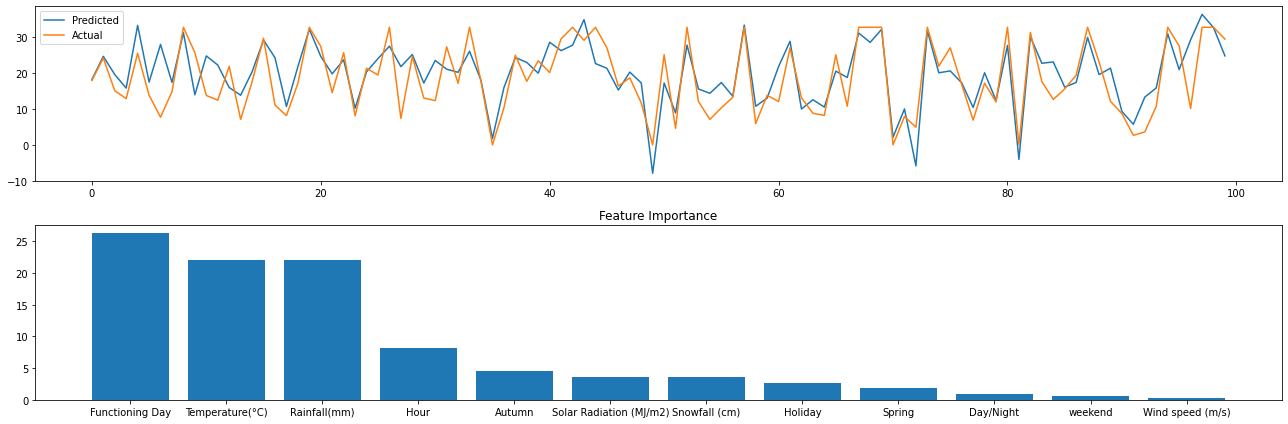

LinearRegression()

In [47]:
# Fit the linear model
lr_model = LinearRegression()
model_analysis(lr_model, X_train, X_test, y_train, y_test)

In [ ]:
reporting['Linear regression']= linear_r2

# SVR

In [ ]:
# Fitting support vector machine model with grid search cv
svr_model = SVR()
param = {'C' : [800,1000,1400,1800,2200]}

gridsearchSVR = GridSearchCV(svr_model, param, scoring = 'r2', cv = 5)
gridsearchSVR.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [800, 1000, 1400, 1800, 2200]}, scoring='r2')

In [ ]:
reporting['SVR'] = svr_r2

## **Decision Tree Regressor**

In [49]:
# Splitting the data into train and test by redefining X
X = scaler.fit_transform(data[features])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0)

MSE : 372001.1516739461
RMSE : 609.9189714002558
MAe : 498.5198960055508
Train R2 : 0.8624364752578376
Test R2 : -952.5455190519507
Adjusted R2 : -961.8940045328521


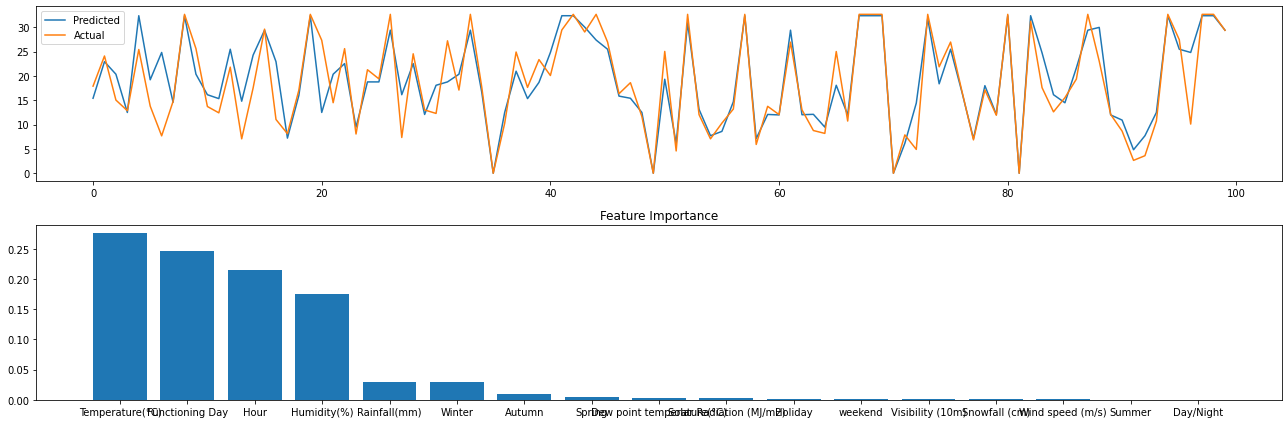

DecisionTreeRegressor(max_depth=10, min_samples_leaf=40, min_samples_split=50,
                      random_state=1)

In [52]:
# Fit the decision tree model with grid search cv
decisiontree = DecisionTreeRegressor(random_state=1)

# HYperparameter Grid
param = {'max_depth' : max_depth,
         'min_samples_split' : min_sample_split,
         'min_samples_leaf' : min_sample_leaf}

# GridSearch to find the best parameters
dt = GridSearchCV(decisiontree, param, scoring='neg_mean_squared_error', cv=5)
dt.fit(X_train, y_train)

# Analysing the model with best set of parametes
model_analysis(dt.best_estimator_, X_train, X_test, y_train, y_test)

In [ ]:
reporting['Decision Tree Regressor'] = decisiontree_r2

# Random Forest Regressor

MSE : 362392.04288756236
RMSE : 601.9900687615722
MAe : 494.25628296406205
Train R2 : 0.8726285018428683
Test R2 : -927.9146205073946
Adjusted R2 : -937.0216265908005


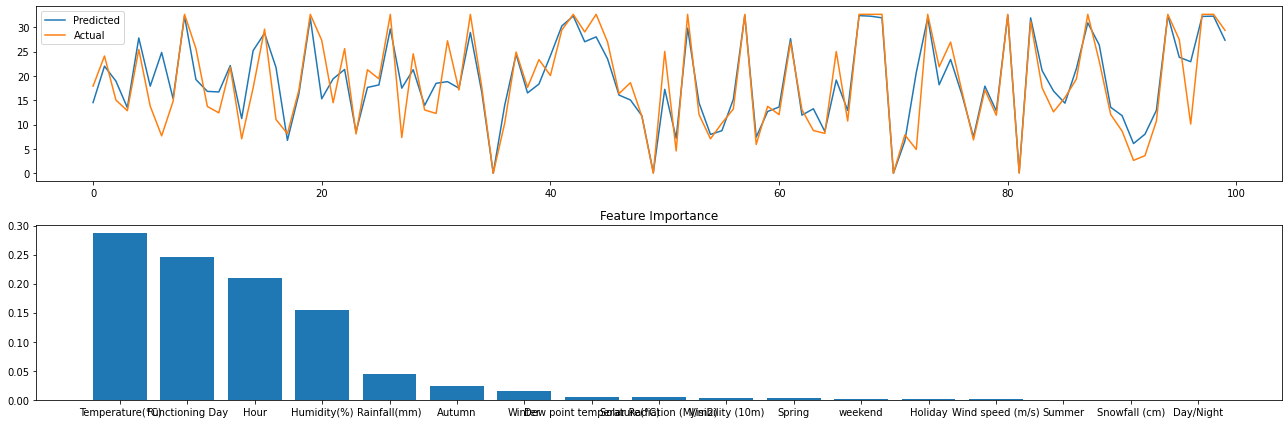

RandomForestRegressor(max_depth=10, min_samples_leaf=40, min_samples_split=50,
                      n_estimators=50)

In [53]:
# Fitting randeom forest with grid search cv
randomForestAlgo = RandomForestRegressor()

# Hyperparameter param
param = {'n_estimators' : n_estimators,
         'max_depth' : max_depth,
         'min_samples_split': min_sample_split,
         'min_samples_leaf': min_sample_leaf}

# GridSearch to find the best parameters
rf = GridSearchCV(randomForestAlgo, param_grid=param, scoring='neg_mean_squared_error',cv=5)
rf.fit(X_train,y_train)

# Analysing the model with best set of parametes
model_analysis(rf.best_estimator_, X_train, X_test, y_train, y_test)

In [ ]:
reporting['Random Forest Regressor'] = RF_r2

# XGBoost Regressor

MSE : 380281.76570269436
RMSE : 616.6699001108245
MAe : 501.48689809809326
Train R2 : 0.9829722475759288
Test R2 : -973.7711049582877
Adjusted R2 : -983.327684418663


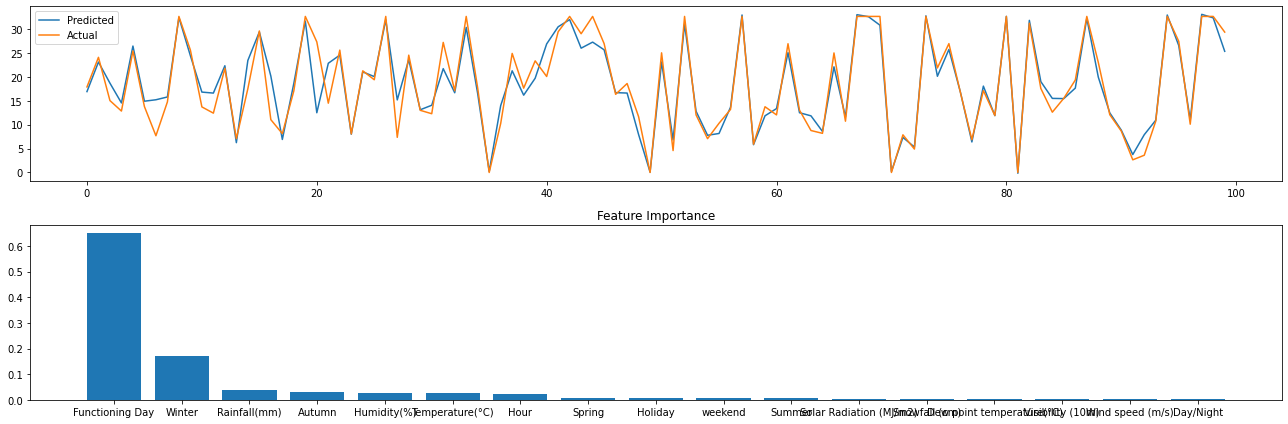

XGBRegressor(eta=0.08, max_depth=8, min_samples_leaf=40, min_samples_split=50,
             n_estimators=150, random_state=3, silent=True)

In [58]:
# Fitting xgb
regressor = XGBRegressor(silent=True, random_state=3)

# Hyperparameter param
param = {'n_estimators' : n_estimators,
         'max_depth' : max_depth,
         'min_samples_split': min_sample_split,
         'min_samples_leaf': min_sample_leaf,
         'eta' : lr_rate}

# GridSearch to find the best parameters
xgb = GridSearchCV(regressor, param_grid=param, scoring='neg_mean_squared_error',cv=5)
xgb.fit(X_train, y_train)

# Analysing the model with best set of parametes
model_analysis(xgb.best_estimator_, X_train, X_test, y_train, y_test)

# GradientBoosting Regressor

MSE : 379660.36088391405
RMSE : 616.1658550130103
MAe : 501.04965893018937
Train R2 : 0.9602807258029452
Test R2 : -972.1782663936784
Adjusted R2 : -981.7192297896949


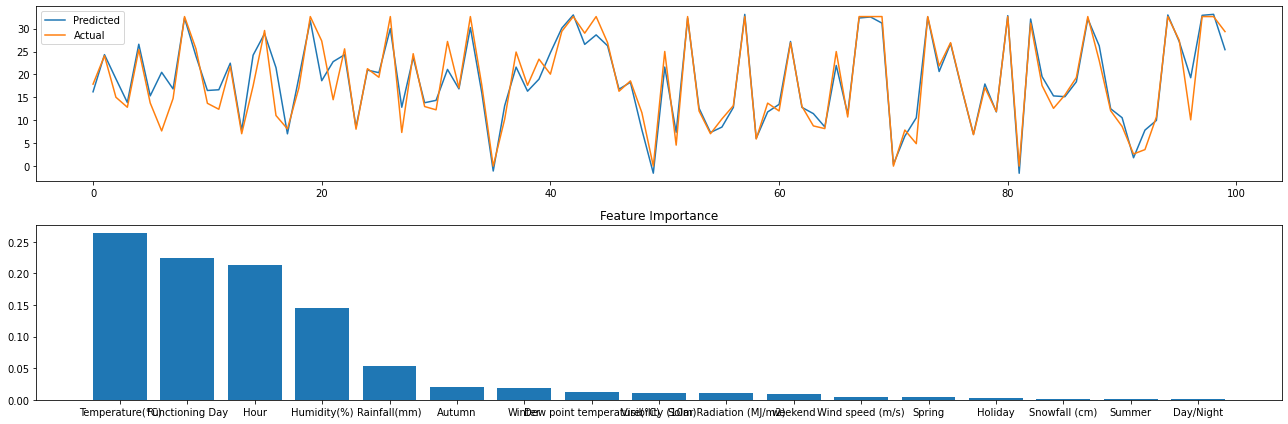

GradientBoostingRegressor(max_depth=10, min_samples_leaf=40,
                          min_samples_split=50, n_estimators=150,
                          random_state=4)

In [59]:
# Regressor
regressor = GradientBoostingRegressor(random_state=4)

# HYperparameter Grid
param = {'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_sample_split,
        'min_samples_leaf' : min_sample_leaf}

# GridSearch to find the best parameters
gbr = GridSearchCV(regressor, param_grid = param, scoring = 'neg_mean_squared_error', cv=5)
gbr.fit(X_train, y_train)

# Analysing the model with best set of parametes
model_analysis(gbr.best_estimator_, X_train, X_test, y_train, y_test)

# Present all the results of every model in a data frame and plot these in function of the model

In [ ]:
data.results = pd.DataFrame()
data_results['modle'] = reporting.keys()
data_results['Score R2'] = reporting.values()

In [ ]:
data_results = data_results.set_index('model')

In [ ]:
dataVizModels=pd.DataFrame(data_results['Score R2'].sort_values(ascending=False))
dataVizModels.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

Conclusion                 
Functioning day is the most influencing feature and temperature is at the second place for LinearRegressor.          
Temperature is the most important feature for DecisionTree, RandomForest and GradientBoosting Regressor.                
Functioning day is the most important feature and Winter is the second most for XGBoostRegressor.              
RMSE Comparisons:

LinearRegressor RMSE : 370.46         
DecissionTreeRegressor RMSE : 302.53           
RandomForestRegressor RMSE : 290.02          
XGBoostRegressor RMSE : 242.72           
GradientBoostingRegressor RMSE : 248.18         
The feature temperature is on the top list for all the regressors except XGBoost.

XGBoost is acting different from all the regressors as it is considering whether it is winter or not. And is it a working day or not. Though winter is also a function of temperature only but it seems this trick of XGBoost is giving better results.                 
XGBoostRegressor has the Least Root Mean Squared Error. So It can be considered as the best model for given problem.